Data setup and cleanup



In [ ]:
!pip install stockquotes

  Preparing metadata (setup.py) ... done
  Created wheel for stockquotes: filename=stockquotes-2.0.1-py3-none-any.whl size=4444 sha256=b14cf6ad8a7c93c2d855cbfc58baca3511141427c42956081151ccff089f0bf4
  Stored in directory: /root/.cache/pip/wheels/3a/41/0b/fbcb3b619a5411a01f8bdae962e6e6ecd89667793ac1c9eabf
Successfully built stockquotes


In [ ]:
import stockquotes as sq
import yfinance as yf

In [ ]:
STOCKS = yf.Ticker("^GSPC")

In [ ]:
STOCKS = STOCKS.history(period="max")

In [ ]:
STOCKS

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,0.0,0.0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,0.0,0.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,0.0,0.0


<Axes: xlabel='Date'>

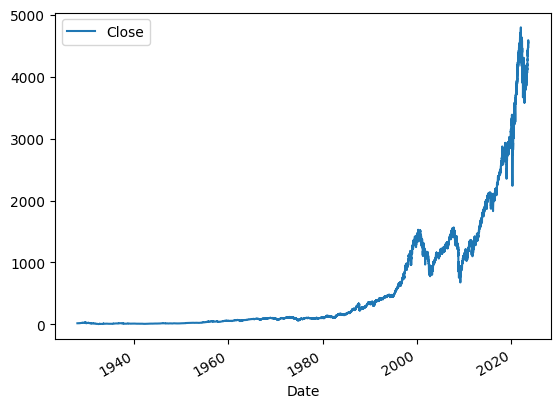

In [ ]:
STOCKS.plot.line(y="Close", use_index = True)

In [ ]:
del STOCKS["Dividends"]
del STOCKS["Stock Splits"]
#del STOCKS["Volume"]

In [ ]:
STOCKS["Next Day"] = STOCKS["Close"].shift(-1)
STOCKS

,Open,High,Low,Close,Volume,Next Day
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137


In [ ]:
STOCKS["Forecast Direction Up"] = (STOCKS["Next Day"] > STOCKS["Close"]).astype(int)

Remove data that might seem irrelevant to today's market

In [ ]:
STOCKS = STOCKS.loc["1990-01-01":].copy()

Machine learning setup

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RC

#n_estimators helps to estimate with more the better
#min_samples_split is used to reduce under fit but with costing accuracy
#random_state is the randomness setting, 1 = same result on multiple runs

model = RC(n_estimators = 100, min_samples_split = 100, random_state = 1)

#split data into train and test set. rows is used as the bifurcation mark. 100 = bifurcation at last 100
rows = 100
train = STOCKS.iloc[:-rows]
test = STOCKS.iloc[-rows:]

predictors = ["Open","Close","High","Low","Volume"]
model.fit(train[predictors], train["Forecast Direction Up"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Calculate the precision

In [ ]:
from sklearn.metrics import precision_score
import pandas as pd

pred = model.predict(test[predictors])
pred = pd.Series(pred, index= test.index)
precision_score(test["Forecast Direction Up"], pred)

0.64

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Forecast Direction Up"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Forecast Direction Up"],preds], axis=1)
  return combined

Method for backtesting a model with 250 step being 250 trading days

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start,data.shape[0],step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

Running the backtest method for related stock

In [ ]:
predictions = backtest(STOCKS, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    3391
1    2572
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Forecast Direction Up"],predictions["Predictions"])

0.5276049766718507

Finding moving averages for daily, weekly, quarterly ,yearly and 4 yearly
Calculating ratio of Closing price to Moving average
Giving this info to the model in order to help in increasing accuracy in predictions

In [ ]:
horizons = {2:"daily",5:"weekly",60:"quarterly",250:"yearly",1000:"quadruple_year"}
new_predictors = []

for horizon in horizons.keys():
  rolling_averages = STOCKS.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizons[horizon]}"
  STOCKS[ratio_column] = STOCKS["Close"]/rolling_averages["Close"]

  trend_column = f"Trend_{horizons[horizon]}"
  STOCKS[trend_column] = STOCKS.shift(1).rolling(horizon).sum()["Forecast Direction Up"]

  new_predictors += [ratio_column,trend_column]

In [ ]:
STOCKS = STOCKS.dropna()

Changing the model to add more n_estimators for better accuracy.
Also changing the predict method to include probability of the stock going up on next day so that decision can be taken to predict as "up" only when certain threshold probability is met

In [ ]:
model = RC(n_estimators = 200, min_samples_split=50,random_state=1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Forecast Direction Up"])
  preds = model.predict_proba(test[predictors])[:,1]
  threshold = .73

  preds[preds >= threshold] =1
  preds[preds < threshold] = 0

  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Forecast Direction Up"],preds], axis=1)
  return combined

In [ ]:
predictions = backtest(STOCKS, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    4960
1.0       2
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Forecast Direction Up"],predictions["Predictions"])

1.0

Improvement seen in accuracy